# Segmentación de Especies con Cluster Analysis

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?


## Sección 1

In [43]:
# importación de librerías importantes
%matplotlib inline
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
import ydata_profiling

In [44]:
# obtención de los datos
from sklearn import datasets
iris = datasets.load_iris()

In [45]:
X = iris.data[:, :] 
df = pd.DataFrame(X, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

### 1. visualización de data

In [37]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: >

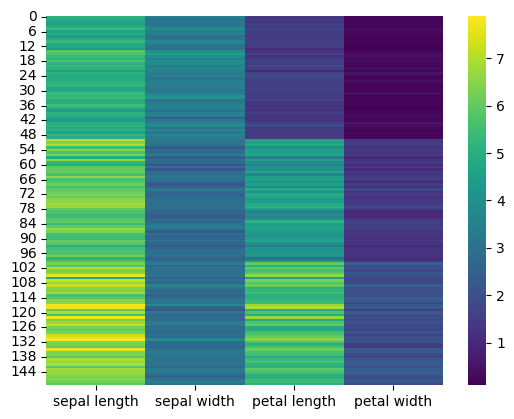

In [38]:
sns.heatmap(df, cmap = 'viridis')

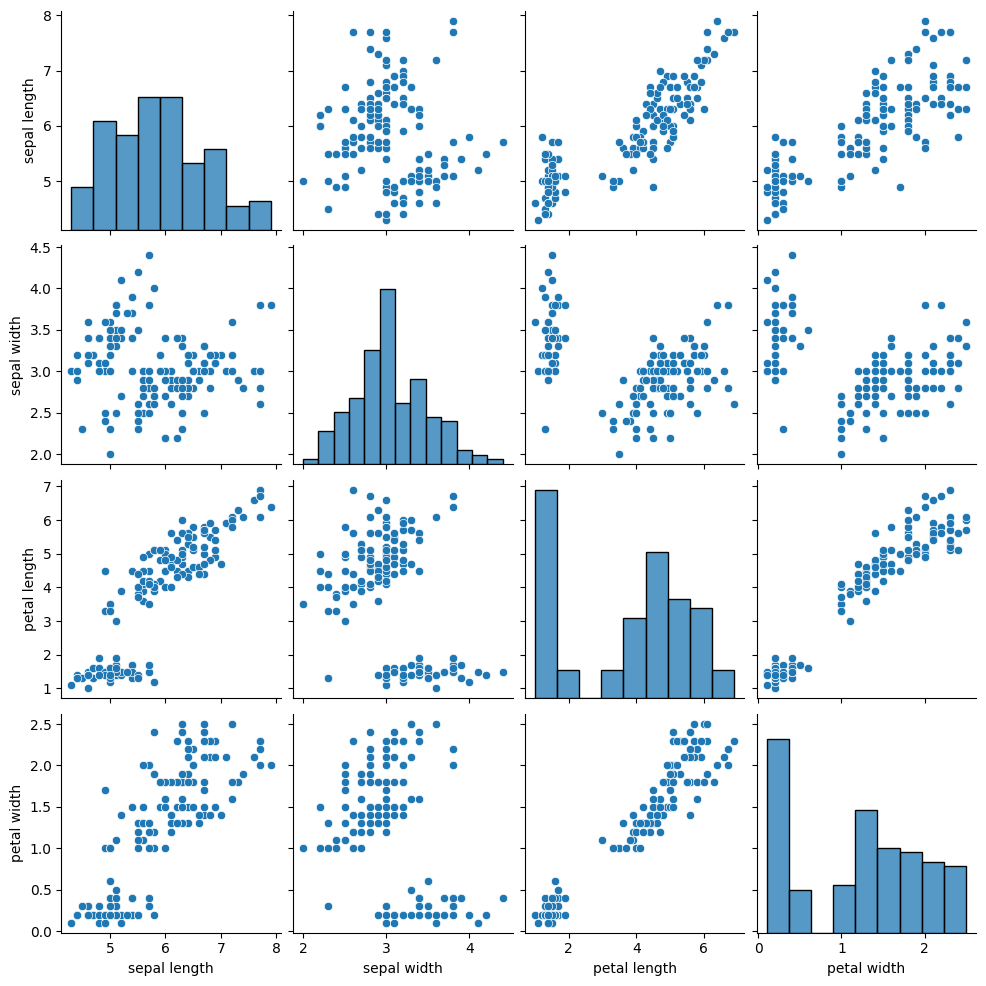

In [39]:
sns.pairplot(df)

In [40]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2. Clusters con K_means

In [50]:
# importación de librerías
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [63]:
X = df[['sepal length', 'sepal width']].values

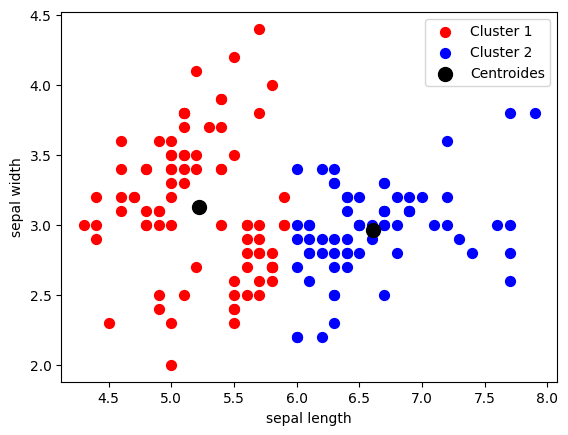

In [64]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# Graficar los clusters
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], s=50, c='blue', label='Cluster 2')

# Graficar centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroides')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

### 3. Clusters estandarizado

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

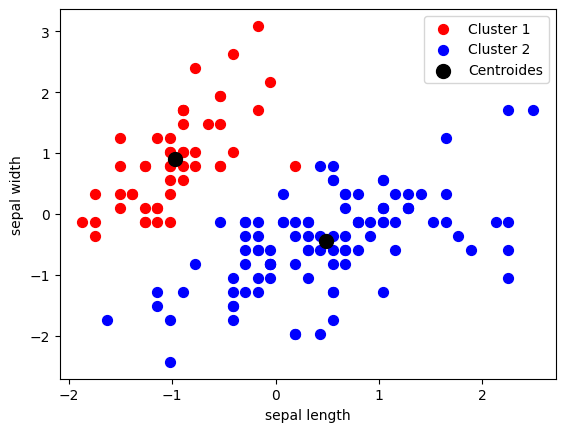

In [66]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# Graficar los clusters
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], s=50, c='blue', label='Cluster 2')

# Graficar centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroides')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

En este caso sí hubo un poco de diferencia ya que muchos de los datos que eran parte del Cluster 1 se pasaron a ser del Cluster 2 debido a la estandarización de los datos que provocó que datos que se encontraban cercanos al Clúster 1 se encontraran un poco más cerca al 2.

### 4. Método del codo

### 5. Gráficas

### 6. Comparación 

## Sección 2

## Sección 3